In [1]:
# import required libraries 
import pandas as pd

In [2]:
# load train dataset to dataframe
df_train = pd.read_csv(r'C:\Users\Supun\Desktop\Data Mining\Project\Dataset\train\train.csv')

In [3]:
# display first five rows of train dataset
df_train.head()

,id,user_id,joke_id,Rating
0,31030_110,31030,110,2.750
1,16144_109,16144,109,5.094
2,23098_6,23098,6,-6.438
3,14273_86,14273,86,4.406
4,18419_134,18419,134,9.375


In [4]:
# display shape of train dataset
df_train.shape

(1092059, 4)

In [5]:
# check for missing values in train dataset
df_train.isnull().sum()

id         0
user_id    0
joke_id    0
Rating     0
dtype: int64

In [6]:
# check is there any irrelevent data in train dataset
print('Column: user_id')
print('Minimum value: ' + str(df_train['user_id'].min()))
print('Maximum value: ' + str(df_train['user_id'].max()))
print('')
print('Column: joke_id')
print('Minimum value: ' + str(df_train['joke_id'].min()))
print('Maximum value: ' + str(df_train['joke_id'].max()))
print('')
print('Column: Rating')
print('Minimum value: ' + str(df_train['Rating'].min()))
print('Maximum value: ' + str(df_train['Rating'].max()))

Column: user_id
Minimum value: 1
Maximum value: 40863

Column: joke_id
Minimum value: 1
Maximum value: 139

Column: Rating
Minimum value: -10.0
Maximum value: 10.0


In [7]:
# check for duplicate values in train dataset
df_train.duplicated(['id']).sum()

0

<AxesSubplot: >

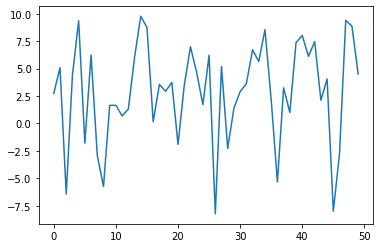

In [8]:
# display ratings of first 50 records
df_train['Rating'].head(50).plot.line()

In [9]:
# load jokes dataset to dataframe
df_jokes = pd.read_csv(r'C:\Users\Supun\Desktop\Data Mining\Project\Dataset\train\jokes.csv')

In [10]:
# display first five rows of jokes dataset
df_jokes.head()

,joke_id,joke_text
0,1,Q. What's O. J. Simpson's web address? A. Slas...
1,2,How many feminists does it take to screw in a ...
2,3,Q. Did you hear about the dyslexic devil worsh...
3,4,They asked the Japanese visitor if they have e...
4,5,Q: What did the blind person say when given so...


In [11]:
# display shape of jokes dataset
df_jokes.shape

(139, 2)

In [12]:
# checking for null values in jokes dataset
df_jokes.isnull().sum()

joke_id      0
joke_text    0
dtype: int64

In [13]:
# check is there any irrelevent data in jokes dataset
print('Column: joke_id')
print('Minimum value: ' + str(df_jokes['joke_id'].min()))
print('Maximum value: ' + str(df_jokes['joke_id'].max()))

Column: joke_id
Minimum value: 1
Maximum value: 139


In [14]:
# check for duplicate values in train dataset
df_jokes.duplicated(['joke_id']).sum()

0

In [15]:
# merging train and jokes dataframes to make final dataframe
df = pd.merge(df_train, df_jokes, on='joke_id', how='outer')
df.head()

,id,user_id,joke_id,Rating,joke_text
0,31030_110,31030,110,2.750,"Judy was having trouble with her computer, so ..."
1,9137_110,9137,110,1.719,"Judy was having trouble with her computer, so ..."
2,27649_110,27649,110,5.031,"Judy was having trouble with her computer, so ..."
3,35355_110,35355,110,3.031,"Judy was having trouble with her computer, so ..."
4,5478_110,5478,110,3.094,"Judy was having trouble with her computer, so ..."


In [16]:
# create dataframe using user_id, joke_id and rating with 10,000 data objects
df = df[{'user_id', 'joke_id', 'Rating'}]
df = df.sample(10000, random_state=100)
df.head()

,Rating,joke_id,user_id
429216,2.125,66,29000
652866,-0.594,2,34385
520932,1.938,102,29852
784852,9.125,125,16845
527899,2.656,127,24802


In [17]:
# create independent variables
X = df.drop(['Rating'], axis = 1)
X.head()

,joke_id,user_id
429216,66,29000
652866,2,34385
520932,102,29852
784852,125,16845
527899,127,24802


In [18]:
# create dependent variables
y = df['Rating']
y.head()

429216    2.125
652866   -0.594
520932    1.938
784852    9.125
527899    2.656
Name: Rating, dtype: float64

In [19]:
# normalizing features set (every feature normalized separately)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
headers = X.columns
temp_X = scaler.fit_transform(X)
scaled_X = pd.DataFrame(temp_X, columns=headers)
scaled_X.head()

,joke_id,user_id
0,0.467153,0.709681
1,0.000000,0.841466
2,0.729927,0.730532
3,0.897810,0.412217
4,0.912409,0.606945


In [20]:
# cross-validation to model traing 
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from numpy import sqrt, mean, absolute, std

def model_acc(model, independent_var, dependent_var):
    y_pred = []
    #define cross-validation method to use
    cv = KFold(n_splits=5, random_state=1, shuffle=True) 

    #use RMSE to evaluate model
    scores = cross_val_score(model, independent_var, dependent_var, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
    
    # get the predictions of the model
    y_pred = cross_val_predict(model, independent_var, dependent_var, cv=cv, n_jobs=-1)
    
    # calculate root mean squared error and standard deviation of scores
    print(str(model)+ ' ' + 'RMSE: %.3f' % sqrt(mean(absolute(scores))) + ' ± %.2f' % std(sqrt(absolute(scores))))
    return y_pred

In [21]:
# using regression algorithms to train model

# linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
y_pred_lr = model_acc(lr, scaled_X, y)

# support vector regression
from sklearn.svm import SVR
svr = SVR()
y_pred_svr = model_acc(svr, scaled_X, y)

# decision treee regression
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
y_pred_dt = model_acc(dt, scaled_X, y)

# random forest regression
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
y_pred_rf = model_acc(rf, scaled_X, y)

# neural network regression
from sklearn.neural_network import MLPRegressor 
mlp = MLPRegressor()
y_pred_mlp = model_acc(mlp, scaled_X, y)

LinearRegression() RMSE: 5.181 ± 0.04
SVR() RMSE: 5.139 ± 0.05
DecisionTreeRegressor() RMSE: 7.138 ± 0.06
RandomForestRegressor() RMSE: 5.636 ± 0.03
MLPRegressor() RMSE: 5.102 ± 0.05


In [22]:
# create new dataframe for prediction values and exporting 
y_real = df_train['Rating'].sample(10000, random_state=100)
stat_df = pd.DataFrame({'LR_Predicted':y_pred_lr, 'SVR_Predicted':y_pred_svr, 'DT_Predicted':y_pred_dt, 'RF_Predicted':y_pred_rf, 'MLP_Predicted':y_pred_mlp, 'Real':y_real})
stat_df = stat_df.reset_index(drop=True)
stat_df.to_excel("Technique_01_Predictions.xlsx", index=False)
stat_df.head()

,LR_Predicted,SVR_Predicted,DT_Predicted,RF_Predicted,MLP_Predicted,Real
0,1.782896,2.872051,3.406,3.03360,2.511313,0.875
1,0.520961,-0.771193,1.562,-1.76194,-1.686660,-3.094
2,2.458800,3.057282,-5.688,-1.00863,2.354038,4.688
3,2.812907,2.519214,-8.219,-0.86262,2.238160,-5.281
4,2.919112,2.373587,8.719,2.50851,2.284455,-0.594


In [44]:
# hyperparameter tuning
mlp_tuned = MLPRegressor(activation = 'tanh')
y_pred_mlp_tuned = model_acc(mlp_tuned, scaled_X, y)

MLPRegressor(activation='tanh') RMSE: 5.162 ± 0.03


In [42]:
# hyperparameter tuning
mlp_tuned = MLPRegressor(solver ='lbfgs')
y_pred_mlp_tuned = model_acc(mlp_tuned, scaled_X, y)

MLPRegressor(solver='lbfgs') RMSE: 5.103 ± 0.04


In [50]:
# hyperparameter tuning
svr_tuned = SVR(kernel = 'sigmoid')
y_pred_svr_tuned = model_acc(svr_tuned, scaled_X, y)

SVR(kernel='sigmoid') RMSE: 398.474 ± 3.77


In [23]:
# fitting mlp regression model because it has higher accuracy
mlp.fit(scaled_X, y)

MLPRegressor()

In [24]:
# load test dataset to dataframe
df_test = pd.read_csv(r'C:\Users\Supun\Desktop\Data Mining\Project\Dataset\test\test.csv')
df_test.head()

,id,user_id,joke_id
0,6194_11,6194,11
1,19356_3,19356,3
2,23426_79,23426,79
3,40030_3,40030,3
4,19806_115,19806,115


In [25]:
# drop 'id' column
df_test_final = df_test.drop(['id'], axis=1)
df_test_final.head()

,user_id,joke_id
0,6194,11
1,19356,3
2,23426,79
3,40030,3
4,19806,115


In [26]:
# normalizing dataframe
scaler = MinMaxScaler()
headers = df_test_final.columns
temp_test = scaler.fit_transform(df_test_final)
scaled_test = pd.DataFrame(temp_test, columns=headers)
scaled_test.head()

,user_id,joke_id
0,0.151559,0.072464
1,0.473667,0.014493
2,0.573271,0.565217
3,0.979614,0.014493
4,0.484680,0.826087


In [27]:
# generate predicted dataset
y_pred_test = []
y_pred_test = mlp.predict(scaled_test)
y_pred_test = pd.DataFrame(y_pred_test, columns =['Rating'])
y_pred_test.head()

,Rating
0,1.827394
1,2.578504
2,2.329292
3,2.390156
4,2.454535


In [28]:
# load submission dataset to dataframe
df_submission = pd.read_csv(r'C:\Users\Supun\Desktop\Data Mining\Project\Dataset\sample_submission.csv')
df_submission.head()

,id,Rating
0,6194_11,0
1,19356_3,0
2,23426_79,0
3,40030_3,0
4,19806_115,0


In [29]:
# create submission dataframe
df_submission = df_submission.drop(['Rating'], axis=1)
submit = pd.merge(df_submission, y_pred_test, left_index=True, right_index=True, how='outer')
submit.head()

,id,Rating
0,6194_11,1.827394
1,19356_3,2.578504
2,23426_79,2.329292
3,40030_3,2.390156
4,19806_115,2.454535


In [30]:
# export submission file
submit.to_csv('Technique_01_Submission.csv',index=False)